In [72]:
import pandas as pd
from bs4 import BeautifulSoup as bs
import re
from lxml import etree
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [68]:
df_listings = pd.read_csv('./listings.csv')
df_reviews = pd.read_csv('./reviews.csv')
df_listings = df_listings.convert_dtypes()
df_reviews = df_reviews.convert_dtypes()


Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [99]:
#to drop
cols_to_drop = ['listing_url','scrape_id','last_scraped','source','picture_url','host_url','host_name','host_thumbnail_url',
                'host_picture_url','has_availability','license']

In [100]:
df_listings.drop(columns=cols_to_drop,inplace=True)

In [88]:
def clean_string(text):
    parser = etree.HTMLParser()
    tree = etree.fromstring(text,etree.HTMLParser())
    text = bs(text,'html.parser').get_text()
    rx = re.compile(r"[^A-Za-z0-9\s.,?!]")
    text = rx.sub(' ', text)
    rx = re.compile(" +")
    text = rx.sub(' ', text).strip()
    return text

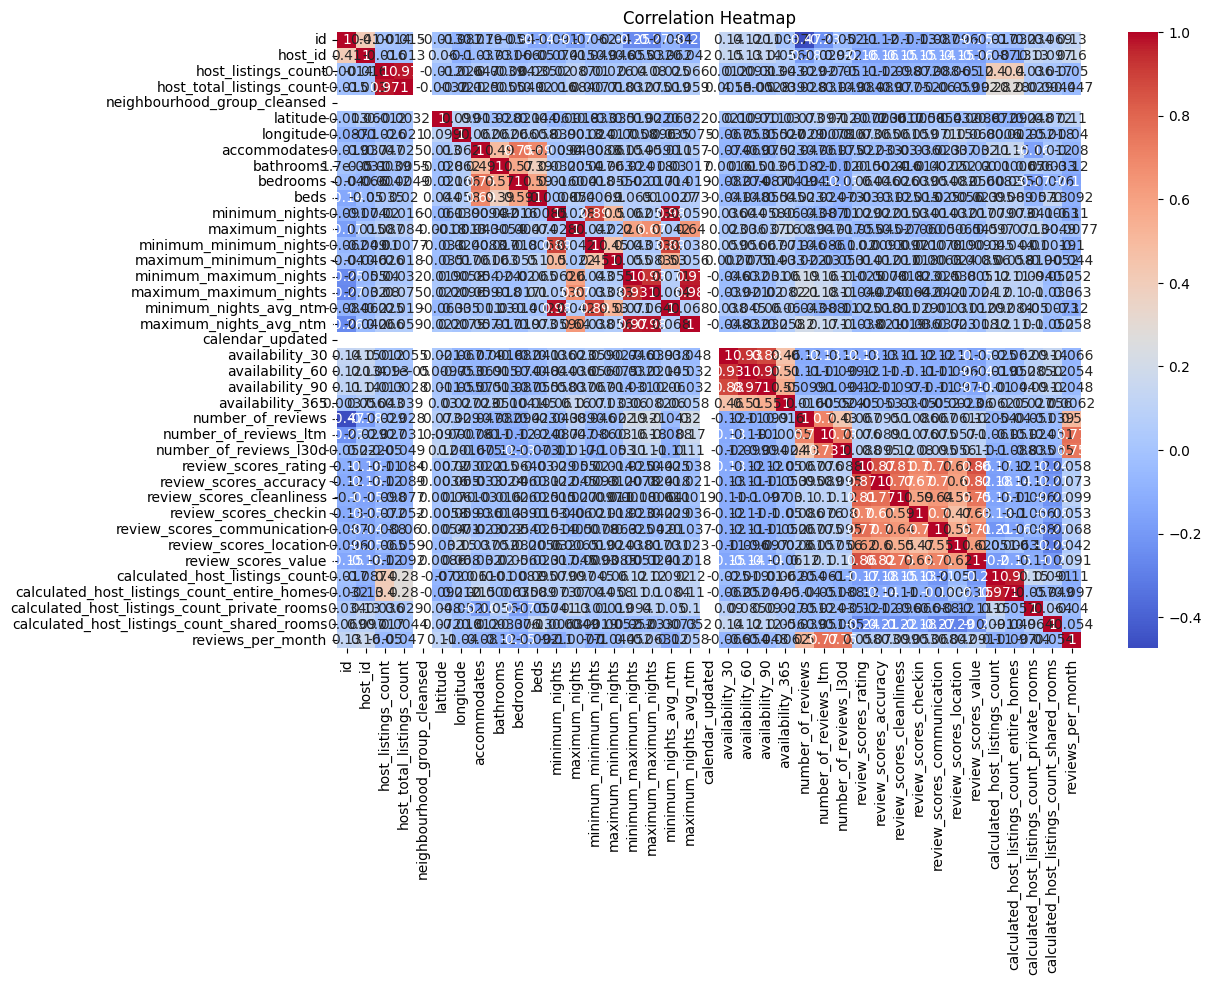

In [101]:
df_corr = df_listings.select_dtypes(['int64','float64'])
corr = df_corr.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()